## A. Charges movement inside a conducting sphere

In [1]:
from scipy.constants import e, electron_mass
import pandas as pd
import charge as ch
import helper_functions as hf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#initialize variables
electric_field = [30, 0, 0]  # V/m
time_tao = 10 ** (-15)  # s
time_intervals = 100

v = 0.002  # m/s
dim = 2
paths = {}

In [3]:
# create 3 options for the charge's path in the field
for _ in range(3):
    # initialize a new path
    charge = ch.Charge(0, 0, 0, 0, -e, electron_mass)
    charges = [charge]
    initial_position = (0, 0, 0)
    data = hf.generate_dataframe([initial_position])

    # generate movement over 100 time intervals
    for i in range(time_intervals):
        # create movement parameters
        charge.calculate_electric_field(charges, electric_field)
        charge.update_motion(time_tao)
        velocity_vec = hf.get_random_velocity(v, dim)
        charge.update_position(velocity_vec, time_tao)
        hf.update_dataframe(data, [charge])

    #calculate drift speed
    drift_speed = data['x_pos'].min()/(time_intervals*time_tao)
    drift_speed = "{:.2e}".format(drift_speed)
    # add the charge's path to the list
    paths[drift_speed] = data

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [4]:
paths

{'-2.66e-03':      id         x_pos         y_pos  z_pos  cycle
 0     1  0.000000e+00  0.000000e+00    0.0      0
 1     0 -6.393458e-19  6.679682e-20    0.0      1
 2     0 -5.274307e-18  1.810994e-19    0.0      2
 3     0 -6.763206e-18 -1.455678e-18    0.0      3
 4     0 -9.603706e-18 -3.445423e-18    0.0      4
 ..   ..           ...           ...    ...    ...
 96    0 -2.586440e-16 -1.309311e-17    0.0     96
 97    0 -2.593416e-16 -1.357698e-17    0.0     97
 98    0 -2.604356e-16 -1.230604e-17    0.0     98
 99    0 -2.649115e-16 -1.309530e-17    0.0     99
 100   0 -2.662184e-16 -1.160283e-17    0.0    100
 
 [101 rows x 5 columns],
 '-2.86e-03':      id         x_pos         y_pos  z_pos  cycle
 0     1  0.000000e+00  0.000000e+00    0.0      0
 1     0 -1.154496e-18 -1.341095e-18    0.0      1
 2     0 -4.916335e-18 -2.995635e-18    0.0      2
 3     0 -8.419579e-18 -1.192374e-18    0.0      3
 4     0 -1.229121e-17 -2.766768e-18    0.0      4
 ..   ..           ...       

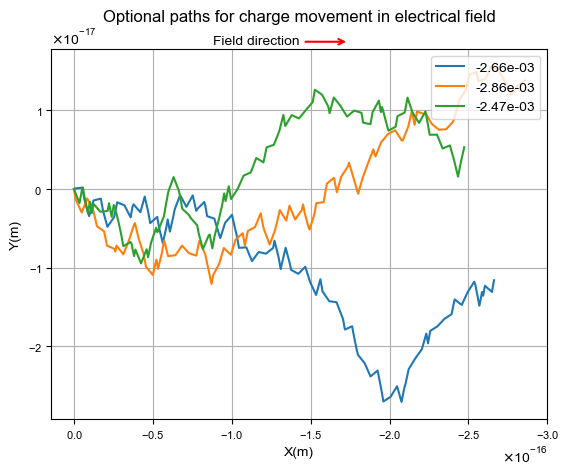

In [5]:
# plot the 3d graph of the charge's path
path_graph = hf.create_paths_graph(paths)
plt.grid(True)
sns.set_palette("Set2")
sns.set_theme(style='darkgrid')
# plot the graph of the
plt.show()

## B. Charges movement inside a conducting sphere

In [6]:
from numpy import linspace, meshgrid
from scipy.constants import e
from scipy.constants import electron_mass
import pandas as pd
import charge
import helper_functions as hf
import shape

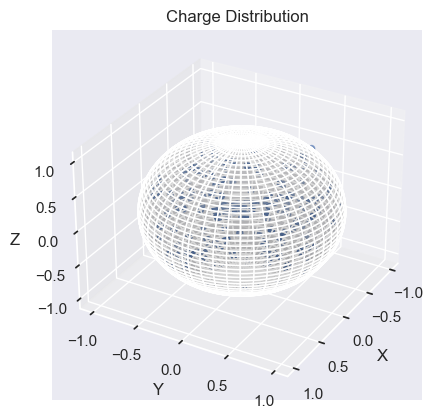

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

/cs/usr/drorde/dev/ChargeFlowSim/shape.py:192: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/cs/usr/drorde/dev/ChargeFlowSim/shape.py:193: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/cs/usr/drorde/dev/ChargeFlowSim/shape.py:194: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/cs/usr/drorde/dev/ChargeFlowSim/shape.py:195: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/cs/usr/drorde/dev/ChargeFlowSim/shape.py:196: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [7]:
sphere = shape.Sphere(1, 3, [])
n = 200
tao = 10**(-3)  # s
sphere.distribute_charges(n, -e, electron_mass)
df = hf.generate_dataframe(sphere.distribution)
# sphere.project_distribution_3d()
sphere.visualise()

In [8]:
df

id     x_pos     y_pos     z_pos  cycle
0      1  0.360888  0.292481 -0.868825      0
1      2 -0.381711 -0.824103 -0.383262      0
2      3 -0.228941  0.298195  0.156003      0
3      4  0.120453 -0.590694 -0.132061      0
4      5  0.838268  0.321956  0.273629      0
..   ...       ...       ...       ...    ...
195  196  0.744198  0.025043 -0.207575      0
196  197 -0.324884  0.793812  0.437978      0
197  198 -0.798718  0.435886 -0.175209      0
198  199  0.106641  0.210695  0.774905      0
199  200 -0.688773 -0.237840 -0.458929      0

[200 rows x 5 columns]

In [9]:
for i in range(100):
    for charge in sphere.charges:
        charge.calculate_electric_field(sphere.charges)
    for charge in sphere.charges:
        charge.update_motion(tao)
    sphere.return_charges_to_sphere()

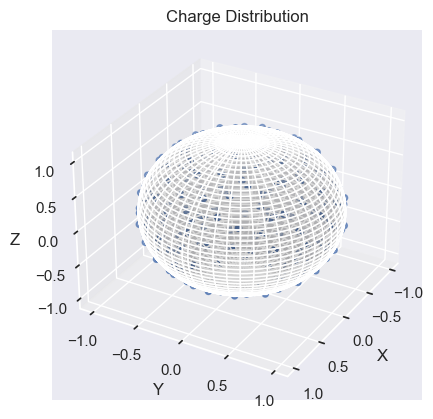

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Point charge 19 at radius 0.91 from the center at point (0.877, -0.084, 0.229) with charge -1.602176634e-19 coulomb and mass 9.1093837015e-31 kg
Point charge 20 at radius 0.971 from the center at point (-0.885, -0.396, 0.065) with charge -1.602176634e-19 coulomb and mass 9.1093837015e-31 kg
Point charge 24 at radius 0.639 from the center at point (0.52, -0.302, 0.213) with charge -1.602176634e-19 coulomb and mass 9.1093837015e-31 kg
Point charge 28 at radius 0.278 from the center at point (-0.231, 0.098, 0.12) with charge -1.602176634e-19 coulomb and mass 9.1093837015e-31 kg
Point charge 32 at radius 0.744 from the center at point (0.396, 0.529, 0.341) with charge -1.602176634e-19 coulomb and mass 9.1093837015e-31 kg
Point charge 44 at radius 0.905 from the center at point (0.391, -0.591, -0.563) with charge -1.602176634e-19 coulomb and mass 9.1093837015e-31 kg
Point charge 52 at radius 0.705 from the center at point (0.165, -0.459, 0.509) with charge -1.602176634e-19 coulomb and mass 

In [10]:
sphere.project_distribution_3d()
sphere.visualise
sphere.print_charges_inside_volume()

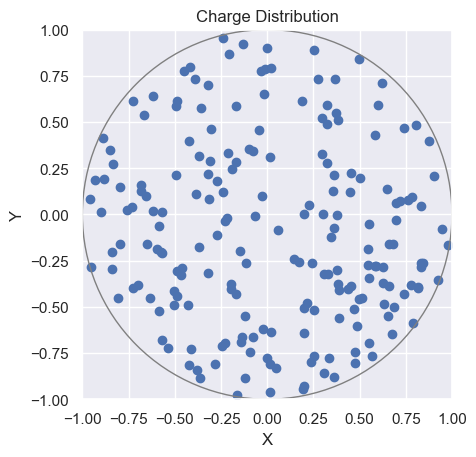

In [11]:
# intialize variables
sphere = shape.Sphere(1, 2, [])
n = 200
tao = 10**(-3)  # s
sphere.distribute_charges(n, -e, electron_mass)
data = hf.generate_dataframe(sphere.distribution)





In [12]:
# run simulation
for i in range(200):
    for charge in sphere.charges:
        charge.calculate_electric_field(sphere.charges)
    for charge in sphere.charges:
        charge.update_motion(tao)
    sphere.return_charges_to_sphere()
    hf.update_dataframe(data, sphere.charges)
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


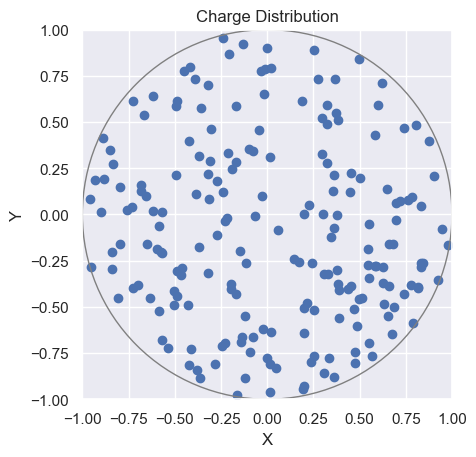

/usr/lib/python3/dist-packages/seaborn/rcmod.py:402: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/cs/usr/drorde/dev/ChargeFlowSim/venv/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



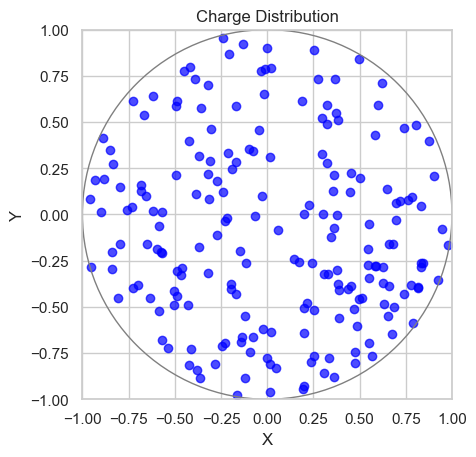

In [13]:
sphere.project_distribution_2d()
sphere.project_distribution_2d_2()